# Comparison of Finite Heatflux Threshold

In [1]:
# Import modules
import sys, os, h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.transforms import Bbox

filepath = os.getcwd()
homepath = filepath.split('data')[0]
sys.path.insert(1, homepath + 'python')

import zonalflow, h5tools, derivative, plot

# Plot parameter
%matplotlib inline
plot.parameters(True, 22, (24,8), 300)

## Boxsize 1x1


### $R/L_T$

In [2]:
# File import and Create picture folder
path = ['S6_rlt6.0/boxsize1x1/Ns16/Nvpar64/Nmu9', 'S6_rlt6.3/boxsize1x1/Ns16/Nvpar64/Nmu9']

filename = [homepath + 'data/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Heatflux-Threshold/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

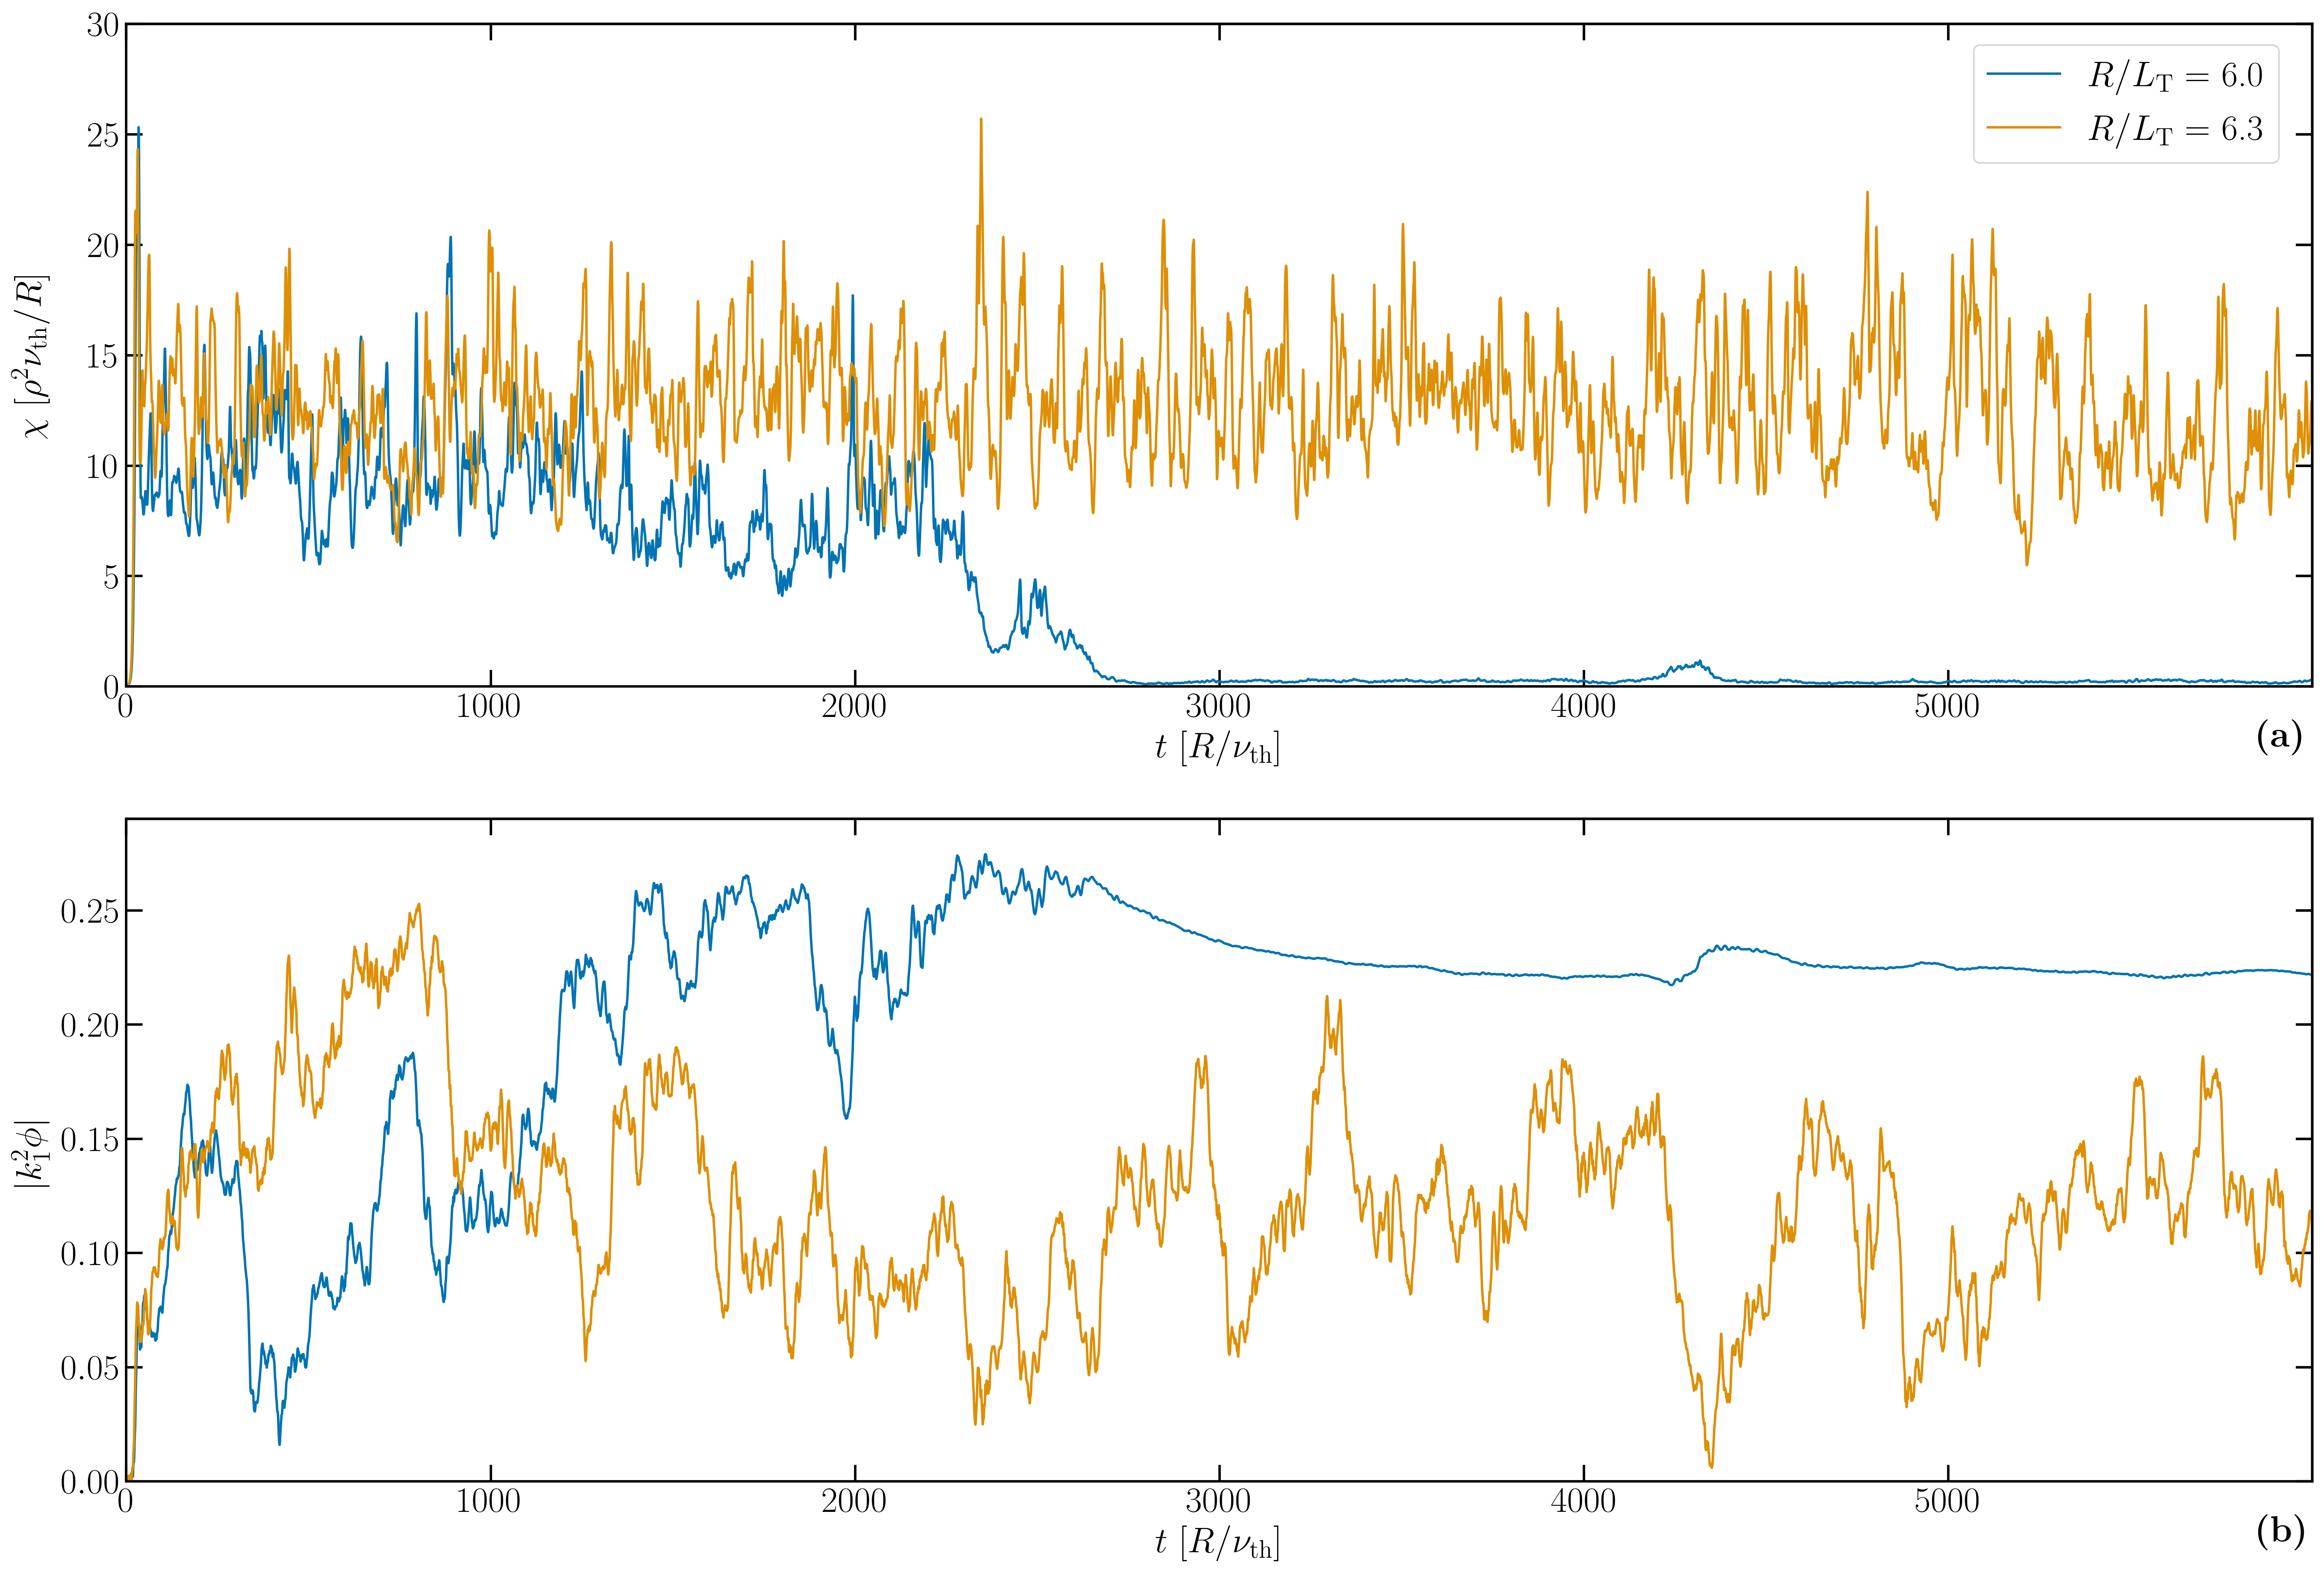

In [3]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(2, 1, figsize = (24,16)) #, sharex=True)
#fig.suptitle('Comparsion of finite heat flux threshold of $R/L_{\mathrm{T}}$')

resolution = [r'$R/L_{\mathrm{T}}$ = 6.0', r'$R/L_{\mathrm{T}}$ = 6.3']

#ax_eflux.set_title(r'$N_{\mathrm{vpar}}$ = 64; $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.035,0.5)

#ax_wexb_max.set_title(r'$N_{\mathrm{vpar}}$ = 64; $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|k_1^2 \phi|$')
ax_wexb_max.yaxis.set_label_coords(-0.035,0.5)

max_index = 10000

for i, n in zip(f, resolution):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:max_index], time[:max_index]

    ax_eflux.plot(time, eflux, label=n)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    xmax = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=xmax)
    ax_eflux.set_ylim(ymin=0, ymax=30)
    
    ax_eflux.legend(loc=(0.845, 0.79))
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[1][:max_index], label=n)
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=xmax)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.29)
    
    #ax_wexb_max.legend(loc='lower right')

#plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.2)

plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0-6.3_boxsize1x1_Ns16_Nvpar64_Nmu9_eflux_comparison.pdf'   , pad=0.02)
plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0-6.3_boxsize1x1_Ns16_Nvpar64_Nmu9_wexb_max_comparison.pdf', pad=0.02)

ax_eflux.text(0.975, -0.09, r'\bf{(a)}', transform=ax_eflux.transAxes)
ax_wexb_max.text(0.975, -0.09, r'\bf{(b)}', transform=ax_wexb_max.transAxes)

plt.savefig(picDir + '/S6_rlt6.0-6.3_boxsize1x1_Ns16_Nvpar64_Nmu9_comparison.pdf', bbox_inches='tight')
